#Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.95*maxfil.

El valor máximo de filas es:  0.4296875
Número de filas mayores a 0.95 * maxFil:  2
Las posiciones de las filas son: 12 y 100
Sus valores son: 0.4296875 y 0.4140625


(0.0, 512.0)

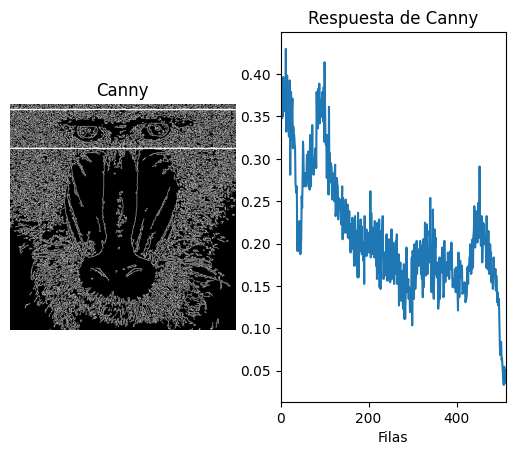

In [4]:
#El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
#print(canny)
#Cuenta el número de píxeles blancos (255) por fila
#Suma los valores de los pixeles por columna
img = cv2.imread('mandril.jpg')
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de columnas, segundo valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por fila
rows = row_counts[:, 0] / (255 * canny.shape[1])
maxFil = max(rows)

#Filas mayores a 0.95 * maxFil
rowsFound = []
for i in range(len(rows)):
    if rows[i] > 0.95 * maxFil:
        rowsFound.append(i)

#Número de filas mayores a 0.95 * maxFil
numOfRows = len(rowsFound)

#Visualización de los resultados
print("El valor máximo de filas es: ", maxFil)
print("Número de filas mayores a 0.95 * maxFil: ", numOfRows)
print(f"Las posiciones de las filas son: {rowsFound[0]} y {rowsFound[1]}")
print(f"Sus valores son: {rows[12]} y {rows[100]}")

#Resaltado con líneas para las filas encontradas
cv2.line(canny, (0, rowsFound[0]), (canny.shape[1], rowsFound[0]), (255, 255, 255), 2)
cv2.line(canny, (0, rowsFound[1]), (canny.shape[1], rowsFound[1]), (255, 255, 255), 2)

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las filas
plt.xlim([0, canny.shape[0]])

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

El valor máximo de filas es:  0.314453125
El valor máximo de columnas es:  0.349609375

Número de filas mayores a 0.95 * maxFil:  3
Las posiciones de las filas son: 3, 82 y 83
Sus valores son: 0.302734375, 0.314453125 y 0.30078125

Número de columnas mayores a 0.95 * maxCols:  1
Las posiciones de las columnas son: 288
Sus valores son: 0.349609375


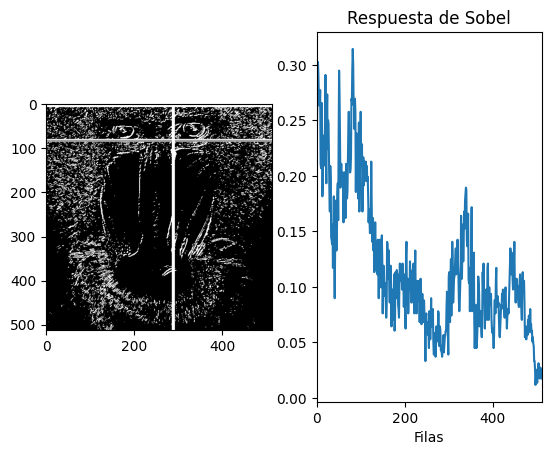

In [5]:
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Sobel convertida a 8 bits
sobel8_v1 = cv2.convertScaleAbs(sobel)
valorUmbral = 130

#Umbralización de la imagen de Sobel
res, imagenUmbralizada = cv2.threshold(sobel8_v1, valorUmbral, 255, cv2.THRESH_BINARY)

#Cuenta el número de píxeles blancos (255) por fila
row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows = row_counts[:, 0] / (255 * imagenUmbralizada.shape[1])
maxFil = max(rows)

#Cuenta el número de píxeles blancos (255) por columna
col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols = col_counts[0] / (255 * imagenUmbralizada.shape[0])
maxCols = max(cols)

#Filas mayores a 0.95 * maxFil
rowsFound = []
for i in range(len(rows)):
    if rows[i] > 0.95 * maxFil:
        rowsFound.append(i)

#Columnas mayores a 0.95 * maxCols
colsFound = []
for i in range(len(cols)):
    if cols[i] > 0.95 * maxCols:
        colsFound.append(i)

#Número de filas y columnas mayores a 0.95 * maxFil y 0.95 * maxCols
numOfRows = len(rowsFound)
numOfCols = len(colsFound)

#Visualización de los resultados
print("El valor máximo de filas es: ", maxFil)
print("El valor máximo de columnas es: ", maxCols)
print("\nNúmero de filas mayores a 0.95 * maxFil: ", numOfRows)
print(f"Las posiciones de las filas son: {rowsFound[0]}, {rowsFound[1]} y {rowsFound[2]}")
print(f"Sus valores son: {rows[3]}, {rows[82]} y {rows[83]}\n")
print("Número de columnas mayores a 0.95 * maxCols: ", numOfCols)
print(f"Las posiciones de las columnas son: {colsFound[0]}")
print(f"Sus valores son: {cols[288]}")

plt.subplot(1, 2, 2)
plt.title("Respuesta de Sobel")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las filas
plt.xlim([0, imagenUmbralizada.shape[0]])

#Filas mayores a 0.95 * maxFil
cv2.line(imagenUmbralizada, (0, 3), (imagenUmbralizada.shape[1], 3), (255, 255, 255), 5)
cv2.line(imagenUmbralizada, (0, 82), (imagenUmbralizada.shape[1], 82), (255, 255, 255), 5)
cv2.line(imagenUmbralizada, (0, 83), (imagenUmbralizada.shape[1], 83), (160, 20, 70), 3)

#Columnas mayores a 0.95 * maxCols
cv2.line(imagenUmbralizada, (288, 0), (288, imagenUmbralizada.shape[0]), (255, 255, 255), 5)

plt.subplot(1, 2, 1)
plt.imshow(imagenUmbralizada, cmap='gray')
plt.show()


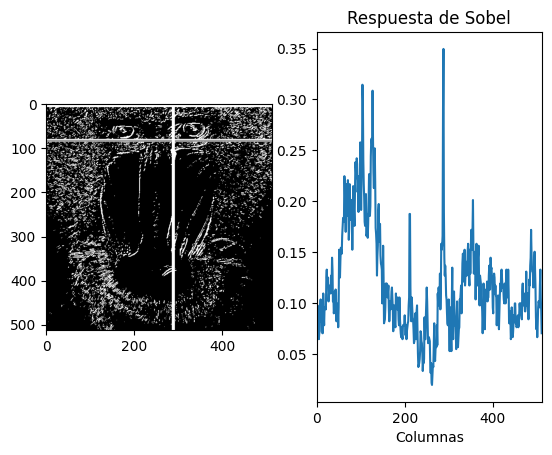

In [13]:
plt.subplot(1, 2, 2)
plt.title("Respuesta de Sobel")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las filas
plt.xlim([0, imagenUmbralizada.shape[1]])

plt.subplot(1, 2, 1)
plt.imshow(imagenUmbralizada, cmap='gray')
plt.show()


TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.

In [6]:
vid = cv2.VideoCapture(0)

#Variables de configuración
salto_filas = 10
block_size = 20     #Tamaño de los bloques en el modo 3
mode = 1            #Modo de visualización por defecto

while True:
    #Lectura del frame
    ret, frame = vid.read()
    if ret:
        fraem = frame.copy()

    #Obtención de las dimensiones del frame
    height, width = frame.shape[:2]

    if mode == 2:
        #Aplicación de un mapa de color
        fraem = cv2.applyColorMap(frame, cv2.COLORMAP_JET)
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        #Búsqueda del mínimo brillo en cada fila
        for i in range(0, height, salto_filas):
            min_brightness = np.min(gray_frame[i, :])
            x_min = np.argmin(gray_frame[i, :])
            cv2.circle(fraem, (x_min, i), 1, (255, 255, 255), 1)

    elif mode == 3:
        for y in range(0, height, block_size):
            for x in range(0, width, block_size):
                #Obtención de los límites de los bloques
                y_end = min(y + block_size, height)
                x_end = min(x + block_size, width)

                #Obtención del color medio de cada bloque
                block = frame[y:y_end, x:x_end]
                color = block.mean(axis=(0, 1), dtype=int)

                #Pintado del bloque
                fraem[y:y_end, x:x_end] = color

    cv2.imshow('Demostrador', fraem)

    #Captura de teclas y cambio de modo
    tecla = cv2.waitKey(20)
    if tecla == 27:
        break
    elif tecla == ord('1'):
        mode = 1
    elif tecla == ord('2'):
        mode = 2
    elif tecla == ord('3'):
        mode = 3

vid.release()
cv2.destroyAllWindows()


TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [7]:
vid = cv2.VideoCapture(0)

#Creación del eliminador de fondo
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)

#Colores para los contornos
colores = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255), (0, 255, 255)]

while(True):
    #Lectura del frame
    ret, frame = vid.read()

    if ret:
        #Volteo del frame
        fraem = cv2.flip(frame, 1)

        #Eliminación del fondo
        objetos = eliminadorFondo.apply(fraem)

        #Mostrar los contornos detectados
        cv2.imshow('Contornos', objetos)

        #Detección de contornos
        contornos, no = cv2.findContours(objetos, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        #Dibujo de contornos y formas sobre objetos en movimiento
        for i in contornos:
            #Se evitan detecciones de ruido o detalles muy pequeños
            if cv2.contourArea(i) > 350:
                #Círculo más pequeño que rodea al contorno
                (x, y), radio = cv2.minEnclosingCircle(i)
                color = colores[np.random.randint(0, len(colores))]
                cv2.circle(fraem, (int(x), int(y)), int(radio), color, 2)

                #Rectángulo más pequeño que puede contener el contorno.
                x, y, w, h = cv2.boundingRect(i)
                cv2.rectangle(fraem, (x, y), (x+w, y+h), color, 2)
                
        #Mostrar el frame con las detecciones
        cv2.imshow('Detección de movimiento', fraem)
    
    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()